HEURISTIC SEARCH


In [ ]:
import heapq
import numpy as np

class Puzzle:
    def __init__(self, initial, target):
        self.initial = tuple(map(tuple, initial))
        self.target = tuple(map(tuple, target))

    def heuristic(self, state):
        """Calculate the number of misplaced tiles as heuristic"""
        return sum(state[i][j] != self.target[i][j] and state[i][j] != 0 for i in range(3) for j in range(3))

    def get_neighbors(self, state):
        """Generate possible moves by swapping the empty tile (0)"""
        neighbors = []
        state = [list(row) for row in state]
        x, y = [(i, row.index(0)) for i, row in enumerate(state) if 0 in row][0]
        moves = {"Up": (-1, 0), "Down": (1, 0), "Left": (0, -1), "Right": (0, 1)}

        for move, (dx, dy) in moves.items():
            nx, ny = x + dx, y + dy
            if 0 <= nx < 3 and 0 <= ny < 3:
                new_state = [row[:] for row in state]
                new_state[x][y], new_state[nx][ny] = new_state[nx][ny], new_state[x][y]
                neighbors.append((move, tuple(map(tuple, new_state))))
        return neighbors

    def solve(self):
        """Solve the puzzle using A* search"""
        pq = [(self.heuristic(self.initial), 0, self.initial, [])]
        visited = set()

        while pq:
            # Extract the best node
            _, g, state, path = heapq.heappop(pq)
            print(f"\nCurrently exploring state with g(n)={g}, h(n)={self.heuristic(state)}, f(n)={g+self.heuristic(state)}:")
            print(np.array(state))

            if state == self.target:
                return path + [state]

            if state in visited:
                continue
            visited.add(state)

            neighbors = self.get_neighbors(state)
            neighbor_info = []

            print("\nGenerated Neighbors:")
            for move, neighbor in neighbors:
                h_val = self.heuristic(neighbor)
                f_val = g + 1 + h_val
                neighbor_info.append((f_val, g + 1, neighbor, path + [state]))
                print(f"Move: {move}")
                print(np.array(neighbor))
                print(f"h(n) = {h_val}, g(n) = {g+1}, f(n) = {f_val}\n")

            # Find the neighbor with the lowest f(n)
            if neighbor_info:
                best = min(neighbor_info, key=lambda x: x[0])
                print(f"--> Choosing move with lowest f(n) = {best[0]}")

            for info in neighbor_info:
                heapq.heappush(pq, info)

        return None

# Initial and Target Matrix
initial_matrix = [[2, 8, 3],
                  [1, 6, 4],
                  [7, 0, 5]]

target_matrix = [[1, 2, 3],
                 [8, 0, 4],
                 [7, 6, 5]]

puzzle = Puzzle(initial_matrix, target_matrix)

print("Initial State:\n", np.array(initial_matrix))
solution = puzzle.solve()

if solution:
    print("\n\nFinal Solution Path:")
    for step in solution:
        print(np.array(step))
        print()
else:
    print("No solution found")


Initial State:
 [[2 8 3]
 [1 6 4]
 [7 0 5]]

Currently exploring state with g(n)=0, h(n)=4, f(n)=4:
[[2 8 3]
 [1 6 4]
 [7 0 5]]

Generated Neighbors:
Move: Up
[[2 8 3]
 [1 0 4]
 [7 6 5]]
h(n) = 3, g(n) = 1, f(n) = 4

Move: Left
[[2 8 3]
 [1 6 4]
 [0 7 5]]
h(n) = 5, g(n) = 1, f(n) = 6

Move: Right
[[2 8 3]
 [1 6 4]
 [7 5 0]]
h(n) = 5, g(n) = 1, f(n) = 6

--> Choosing move with lowest f(n) = 4

Currently exploring state with g(n)=1, h(n)=3, f(n)=4:
[[2 8 3]
 [1 0 4]
 [7 6 5]]

Generated Neighbors:
Move: Up
[[2 0 3]
 [1 8 4]
 [7 6 5]]
h(n) = 3, g(n) = 2, f(n) = 5

Move: Down
[[2 8 3]
 [1 6 4]
 [7 0 5]]
h(n) = 4, g(n) = 2, f(n) = 6

Move: Left
[[2 8 3]
 [0 1 4]
 [7 6 5]]
h(n) = 3, g(n) = 2, f(n) = 5

Move: Right
[[2 8 3]
 [1 4 0]
 [7 6 5]]
h(n) = 4, g(n) = 2, f(n) = 6

--> Choosing move with lowest f(n) = 5

Currently exploring state with g(n)=2, h(n)=3, f(n)=5:
[[2 0 3]
 [1 8 4]
 [7 6 5]]

Generated Neighbors:
Move: Down
[[2 8 3]
 [1 0 4]
 [7 6 5]]
h(n) = 3, g(n) = 3, f(n) = 6

Move: Left

A* SEARCH


In [ ]:
9import heapq

class Graph:
    def __init__(self):
        self.graph = {}
        self.heuristics = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append(v)
        self.graph[v].append(u)

    def set_heuristic(self, h_values):
        self.heuristics = h_values

    def a_star_search(self, start, goal):
        open_set = [(self.heuristics[start], 0, start, [])]  # (f, g, node, path)
        closed_set = set()
        level = 0

        while open_set:
            print(f"\n--- Level {level} ---")
            print("Open set nodes with (g(n), h(n), f(n)):")

            for f_val, g_val, node, path in open_set:
                print(f"Node {node}: g={g_val}, h={self.heuristics[node]}, f={f_val}")

            f, g, node, path = heapq.heappop(open_set)
            print(f"\n>>> Expanding node {node} with f(n) = {f}")

            if node == goal:
                return path + [node]

            if node in closed_set:
                continue
            closed_set.add(node)

            neighbors = self.graph.get(node, [])
            for neighbor in neighbors:
                if neighbor not in closed_set:
                    g_new = g + 1  # assuming cost between nodes = 1
                    f_new = g_new + self.heuristics[neighbor]
                    heapq.heappush(open_set, (f_new, g_new, neighbor, path + [node]))

            level += 1

        return None

# Initialize the graph
graph = Graph()

# Define edges
graph.add_edge("S", "A")
graph.add_edge("S", "B")
graph.add_edge("A", "C")
graph.add_edge("A", "D")
graph.add_edge("B", "E")
graph.add_edge("B", "F")
graph.add_edge("E", "H")
graph.add_edge("F", "I")
graph.add_edge("F", "G")  # Goal Node

# Set heuristic values
heuristic_values = {"S": 14, "A": 12, "B": 5, "C": 7, "D": 3, "E": 8, "F": 2, "H": 4, "I": 9, "G": 0}
graph.set_heuristic(heuristic_values)

# Run A* search
start_node = "S"
goal_node = "G"
print(f"Finding the shortest path from {start_node} to {goal_node} using A* Search:\n")
solution_path = graph.a_star_search(start_node, goal_node)

if solution_path:
    print("\nSolution path:", " → ".join(solution_path))
else:
    print("No path found")


Finding the shortest path from S to G using A* Search:


--- Level 0 ---
Open set nodes with (g(n), h(n), f(n)):
Node S: g=0, h=14, f=14

>>> Expanding node S with f(n) = 14

--- Level 1 ---
Open set nodes with (g(n), h(n), f(n)):
Node B: g=1, h=5, f=6
Node A: g=1, h=12, f=13

>>> Expanding node B with f(n) = 6

--- Level 2 ---
Open set nodes with (g(n), h(n), f(n)):
Node F: g=2, h=2, f=4
Node A: g=1, h=12, f=13
Node E: g=2, h=8, f=10

>>> Expanding node F with f(n) = 4

--- Level 3 ---
Open set nodes with (g(n), h(n), f(n)):
Node G: g=3, h=0, f=3
Node E: g=2, h=8, f=10
Node I: g=3, h=9, f=12
Node A: g=1, h=12, f=13

>>> Expanding node G with f(n) = 3

Solution path: S → B → F → G


BEST FIRST SEARCH

In [ ]:
import heapq

class Graph:
    def __init__(self):
        self.graph = {}
        self.heuristics = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append(v)
        self.graph[v].append(u)

    def set_heuristic(self, h_values):
        self.heuristics = h_values

    def best_first_search(self, start, goal):
        open_list = [(self.heuristics[start], start, [])]
        closed_list = set()
        level = 0

        while open_list:
            print(f"\nLevel {level}")
            print("Open list nodes with h(n):")
            for h_val, node, path in open_list:
                print(f"Node {node}: h = {h_val}")

            h, node, path = heapq.heappop(open_list)
            print(f"\nExpanding node {node} with h(n) = {h}")

            if node == goal:
                return path + [node]

            if node in closed_list:
                continue
            closed_list.add(node)

            neighbors = self.graph.get(node, [])
            for neighbor in neighbors:
                if neighbor not in closed_list:
                    heapq.heappush(open_list, (self.heuristics[neighbor], neighbor, path + [node]))

            level += 1

        return None

graph = Graph()

graph.add_edge("S", "A")
graph.add_edge("S", "B")
graph.add_edge("A", "C")
graph.add_edge("A", "D")
graph.add_edge("B", "E")
graph.add_edge("B", "F")
graph.add_edge("E", "H")
graph.add_edge("F", "I")
graph.add_edge("F", "G")

heuristic_values = {
    "S": 14, "A": 12, "B": 5, "C": 7, "D": 3,
    "E": 8, "F": 2, "H": 4, "I": 9, "G": 0
}
graph.set_heuristic(heuristic_values)

start_node = "S"
goal_node = "G"
print(f"\nFinding the path from {start_node} to {goal_node} using Best-First Search:\n")
solution_path = graph.best_first_search(start_node, goal_node)

if solution_path:
    print("\nFinal Path:", " → ".join(solution_path))
else:
    print("\nNo path found")



Finding the path from S to G using Best-First Search:


Level 0
Open list nodes with h(n):
Node S: h = 14

Expanding node S with h(n) = 14

Level 1
Open list nodes with h(n):
Node B: h = 5
Node A: h = 12

Expanding node B with h(n) = 5

Level 2
Open list nodes with h(n):
Node F: h = 2
Node A: h = 12
Node E: h = 8

Expanding node F with h(n) = 2

Level 3
Open list nodes with h(n):
Node G: h = 0
Node E: h = 8
Node I: h = 9
Node A: h = 12

Expanding node G with h(n) = 0

Final Path: S → B → F → G


Polynomial equation solve using 3 layer DNN
y = 5x^3−10x^2−20x+10

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - loss: 0.1459 - mae: 0.2853 - val_loss: 0.4224 - val_mae: 0.5130
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1197 - mae: 0.2512 - val_loss: 0.3548 - val_mae: 0.4748
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0990 - mae: 0.2227 - val_loss: 0.2963 - val_mae: 0.4380
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0817 - mae: 0.1955 - val_loss: 0.2435 - val_mae: 0.4015
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0668 - mae: 0.1691 - val_loss: 0.2006 - val_mae: 0.3692
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0552 - mae: 0.1450 - val_loss: 0.1633 - val_mae: 0.3383
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0454 - mae: 0.1328 - val_loss: 0.1289 - val_mae: 0.3064
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0374 - mae: 0.1260 - val_loss: 0.0987 - val_mae: 0.2747
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0317 - mae:

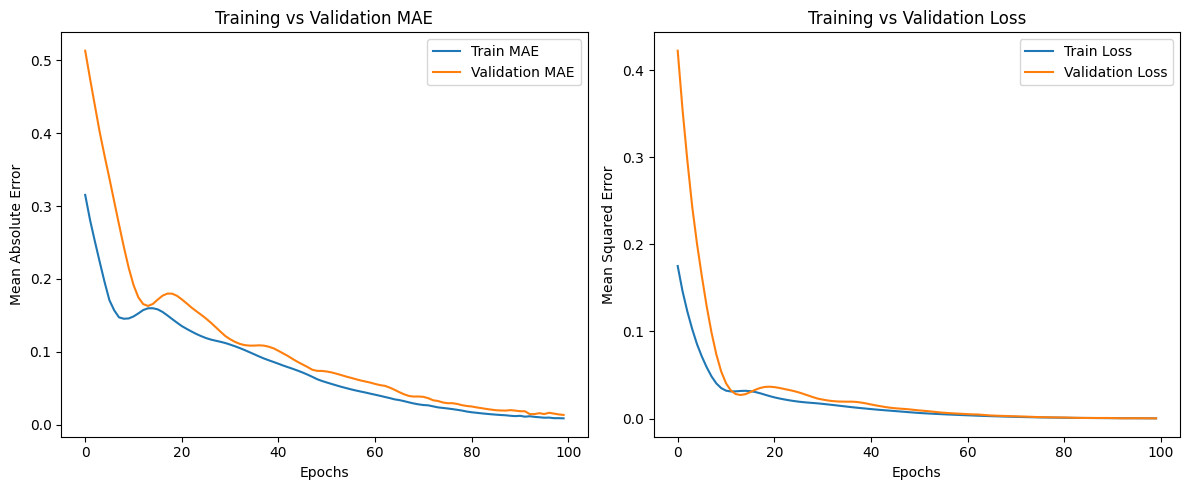


Test Results:
Test Loss (MSE): 0.0007
Test MAE: 0.0195
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


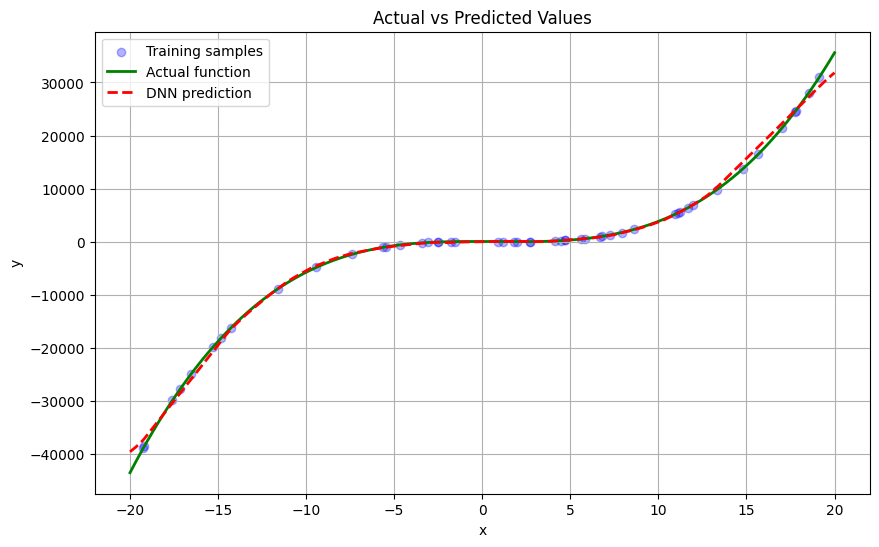

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# 1. Generate the dataset
def polynomial_func(x):
    return 5 * x**3 - 10 * x**2 - 20 * x + 10

# Generate 250 random samples between -20 and 20
x = np.random.uniform(-20, 20, 50)
y = polynomial_func(x)

# 2. Normalize data to [-1, 1] range
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x_norm = 2 * (x - x_min) / (x_max - x_min) - 1
y_norm = 2 * (y - y_min) / (y_max - y_min) - 1

# Reshape for neural network input
x_norm = x_norm.reshape(-1, 1)
y_norm = y_norm.reshape(-1, 1)

# 3. Split data into train (90%), validation (5%), and test (5%)
indices = np.arange(x_norm.shape[0])
np.random.shuffle(indices)

x_norm = x_norm[indices]
y_norm = y_norm[indices]

n_samples = x_norm.shape[0]
n_test = n_samples // 20  # 5%
n_val = n_samples // 20   # 5%

x_test = x_norm[:n_test]
y_test = y_norm[:n_test]

x_val = x_norm[n_test:n_test+n_val]
y_val = y_norm[n_test:n_test+n_val]

x_train = x_norm[n_test+n_val:]
y_train = y_norm[n_test+n_val:]

# 4. Build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# Display model architecture
model.summary()

# 5. Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

# 6. Plot training history
plt.figure(figsize=(12, 5))

# Training vs Validation MAE (accuracy)
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label="Train MAE")
plt.plot(history.history['val_mae'], label="Validation MAE")
plt.title("Training vs Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()

# Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.tight_layout()
plt.show()

# 7. Evaluate on test set
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Results:")
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# 8. Plot actual vs predicted values
x_plot = np.linspace(-20, 20, 250)
x_plot_norm = 2 * (x_plot - x_min) / (x_max - x_min) - 1
x_plot_norm = x_plot_norm.reshape(-1, 1)

y_pred_norm = model.predict(x_plot_norm)

# Denormalize for plotting
x_plot_denorm = (x_plot_norm + 1) * (x_max - x_min) / 2 + x_min
y_pred_denorm = (y_pred_norm + 1) * (y_max - y_min) / 2 + y_min
y_actual_denorm = polynomial_func(x_plot_denorm)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Training samples', alpha=0.3)
plt.plot(x_plot_denorm, y_actual_denorm, 'g-', label='Actual function', linewidth=2)
plt.plot(x_plot_denorm, y_pred_denorm, 'r--', label='DNN prediction', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

explanation

In [ ]:
"""
What is a seed?

A seed is a starting point for a random number generator.
In computers, "random" numbers are actually pseudorandom — they are generated by a mathematical formula.
If you use the same seed, you will get the same random numbers every time.
If you do not set a seed, each time you run the program you may get different random numbers.

In Python, seeds are used in libraries like NumPy (np.random.seed()) and TensorFlow (tf.random.set_seed())
to make sure results are reproducible.

Why is seed 0 used?

The number 0 has no special meaning.
It is just a commonly used simple number to fix randomness.
You could also use 1, 2, 100, 12345 — any number will work.
The important point is: use the same seed every time you want the same results.

In short:

np.random.seed(0) makes NumPy random numbers reproducible.
tf.random.set_seed(0) makes TensorFlow random numbers reproducible.
Seed 0 is just a simple choice. You could use other numbers too if you want.
"""


FCNN

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

inputs = Input(shape=(28,28,1))
x = Flatten()(inputs)
x = Dense(128 , activation = 'relu' ,)(x)
x = Dense(64 , activation = 'relu' ,)(x)
x = Dense(32 , activation = 'relu' ,)(x)
oututs = Dense(10 , activation = 'softmax' ,)(x)

fcnn_model = Model(inputs,oututs)
fcnn_model.summary()

CNN

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

inputs = Input(shape=(28,28,1))
x = Conv2D(32,(3,3),activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3) , activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32 , activation='relu')(x)
oututs = Dense(10, activation='softmax')(x)

cnn_model = Model(inputs,oututs)
cnn_model.summary()

TRAIN FCNN

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

(trainX, trainY), (testX,testY) = fashion_mnist.load_data()

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

trainX = trainX.reshape(-1, 28, 28 ,1)
testX = testX.reshape(-1, 28, 28, 1)

trainY = to_categorical(trainY,10)
testY = to_categorical(testY,10)

fcnn_model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])
fcnn_model.fit(trainX, trainY,epochs=10,batch_size=32,validation_split=0.2)

test_loss, test_acc = fcnn_model.evaluate(testX,testY)
print(f"FCNN test accuracy:{test_acc:.4f}, TestLoss:{test_loss:.4f}")


TRAIN CNN

In [ ]:
cnn_model.compile(optimizer='adam' , loss="categorical_crossentropy" , metrics=['accuracy'])
cnn_model.fit(trainX,trainY,epochs=10,batch_size=32,validation_split=0.2)

test_loss, test_acc = cnn_model.evaluate(testX,testY)
print(f"CNN Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Build a CNN having a pre-trained MobileNet as backbone to classify 10
classes.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = tf.image.resize(trainX, [64, 64])
testX = tf.image.resize(testX, [64, 64])

trainX = preprocess_input(tf.cast(trainX, tf.float32))
testX = preprocess_input(tf.cast(testX, tf.float32))

trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False

inputs = Input(shape=(64, 64, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=16, validation_data=(testX, testY))

loss, acc = model.evaluate(testX, testY)
print(f"\nMobileNetV2 Test Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


<ipython-input-1-0666cb563c69>:31: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.6315 - loss: 1.0725 - val_accuracy: 0.7044 - val_loss: 0.8609
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7547 - loss: 0.7053 - val_accuracy: 0.7091 - val_loss: 0.8378
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.7964 - loss: 0.5751 - val_accuracy: 0.7119 - val_loss: 0.8922
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.8345 - loss: 0.4648 - val_accuracy: 0.6947 - val_loss: 0.9716
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8705 - loss: 0.3667 - val_accuracy: 0.7033 - val_loss: 1.0446
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9027 - loss: 0.2773 - val_accuracy: 0.6989 - val_loss: 1.1900
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.9310 - loss: 0.2040 - val_accuracy: 0.6932 - val_loss: 1.3302
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━

2a_Fashion_MNIST_FCNN_classifier_finetune.ipynb

In [ ]:


from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
import keras



In [ ]:


def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


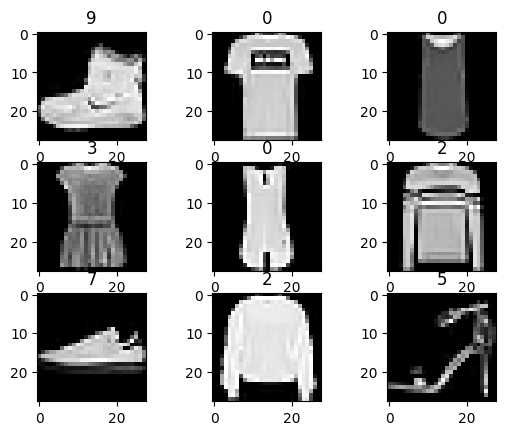

In [ ]:


# Load data
(trainX, trainY), (testX, testY) = load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Dispaly some loaded image data
display_img(trainX[:9], trainY[:9])



prepare datasets

In [ ]:
trainX = np.expand_dims(axis = -1)